In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

PDF -> Probability Density Function<br>
PMF -> Probability Mass Function<br>
CDF -> Cumulative Distribution Function

### Normal distribution

In [2]:
from scipy.stats import norm
# Generate random numbers for given mean and std 
mean = 0
std = 1
samples_norm = norm.rvs(size=10000, loc=mean, scale=std)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

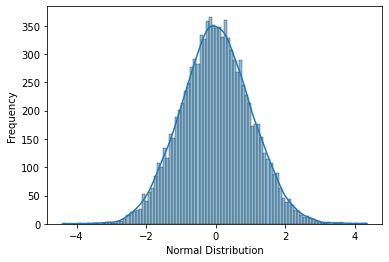

In [3]:
# plot normal distribution using seaborn
sns.histplot(samples_norm, bins=100, kde=True).set(xlabel='Normal Distribution', ylabel='Frequency')

In [4]:
# Evaluate the PDF for the same distribution at point 0
norm(mean, std).pdf(0)

0.3989422804014327

In [5]:
# Evaluate the CDF for the distribution at point 0
# As the point 0 is the mean we expect to find half of
# the values up to this point.
norm(mean, std).cdf(0)

0.5

#### Empirical rule (68–95–99.7 rule)
* 68.27% of values are concentrated within 1 standard deviation of the mean (μ-1σ <= X <= μ+1σ)
* 95.45% of values are concentrated within 2 standard deviations of the mean (μ-2σ <= X <= μ+2σ)
* 99.73% of values are concentrated within 3 standard deviations of the mean (μ-3σ <= X <= μ+3σ)    

![Confidence Intervals](./images/confidence_intervals.png)
[image source](https://www.kdnuggets.com/2018/08/basic-statistics-python-probability.html)

In [6]:
# CDF between 1 standard deviations of the mean
cdf_68 = norm(mean, std).cdf(1*std) - norm(mean, std).cdf(-1*std)
print("CDF(-σ | σ): {:.4f}".format(cdf_68))

# CDF between 2 standard deviations of the mean
cdf_95 = norm(mean, std).cdf(2*std) - norm(mean, std).cdf(-2*std)
print("CDF(-2σ | 2σ): {:.4f}".format(cdf_95))

# CDF between 3 standard deviations of the mean
cdf_99 = norm(mean, std).cdf(3*std) - norm(mean, std).cdf(-3*std)
print("CDF(-3σ | 3σ): {:.4f}".format(cdf_99))

CDF(-σ | σ): 0.6827
CDF(-2σ | 2σ): 0.9545
CDF(-3σ | 3σ): 0.9973


Bellow we calculate the 5% and 95% quantiles and they return how many standard deviations we're from the mean for each proportion. With the results we can calculate the difference of CDF and get 90% (95% - 5%)

In [7]:
# Z-score of the 5% and 95% quantiles
q_95 = norm(mean, std).ppf(0.95)
q_05 = norm(mean, std).ppf(0.05)
print("5% and 95% quantiles: {:.2f} | {:.2f}".format(q_05, q_95))

# CDF between 1.65 standard deviations of the mean
cdf_x = norm(mean, std).cdf(q_95) - norm(mean, std).cdf(q_05)
print("CDF(q_95 - q_05): {:.2f}".format(cdf_x))

5% and 95% quantiles: -1.64 | 1.64
CDF(q_95 - q_05): 0.90


To plot the distribution using numpy and matplotlib.
<br>
[reference]('https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html')

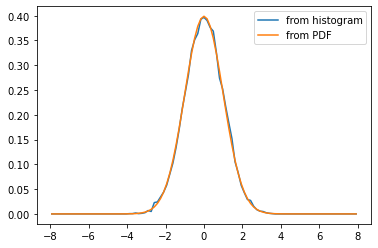

In [8]:
# first we sample from the normal distribution using numpy
samples_norm = np.random.normal(loc=mean, scale=std, size=10000) 

x_values = np.linspace(-8, 8, 100)
hist, bins = np.histogram(samples_norm, bins=x_values, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1]) # shift 1 sum with the next and divide by 2

# generate pdf from center of bins
pdf = norm(loc=mean, scale=std).pdf(bin_centers)

plt.plot(bin_centers, hist, label='from histogram')
plt.plot(bin_centers, pdf, label='from PDF')
plt.legend()
plt.show()


---


### Uniform distribution

In [9]:
from scipy.stats import uniform

In [10]:
# generate random numbers from uniform distribution
start = 0
width = 1
data_uniform = uniform.rvs(size=10000, loc = start, scale=width)

[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

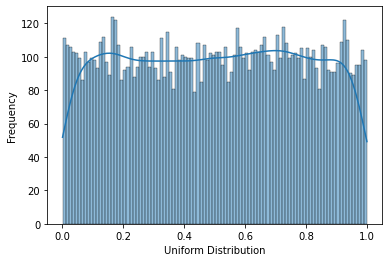

In [11]:
# plot uniform distribution using seaborn
sns.histplot(data_uniform, bins=100, kde=True).set(xlabel='Uniform Distribution', ylabel='Frequency')

The uniform distribution has value 1 in a defined interval and 0 for the rest.<br>
In this case a PDF returns 1 for any variable in the interval [0,1] and 0 for any variable out of this interval.

In [12]:
# Evaluate the PDF for the same distribution at different points
unif_m20 = uniform(start, width).pdf(-2)
unif_00 = uniform(start, width).pdf(0)
unif_05 = uniform(start, width).pdf(0.5)
unif_11 = uniform(start, width).pdf(1.1)
print("PDF of uniform distribution [0,1] for:")
print("x=-2:", unif_m20)
print("x=0:", unif_00)
print("x=0.5:", unif_05)
print("x=1.1:", unif_11)

PDF of uniform distribution [0,1] for:
x=-2: 0.0
x=0: 1.0
x=0.5: 1.0
x=1.1: 0.0


In [13]:
# Evaluate the CDF for the distribution at point 0.5
# As the point 0.5 is the mean we expect to find half of
# the values up to this point.
uniform(start, width).cdf(0.5)

0.5


---


### Bernoulli distribution

In [14]:
from scipy.stats import bernoulli

In [15]:
# generate 10000 bernoulli trials which can be 0 or 1, 
# the only possible outcomes (e.g. coin toss), with success probability p
p = 0.7
data_bernoulli = bernoulli.rvs(size=10000, p=p)

[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

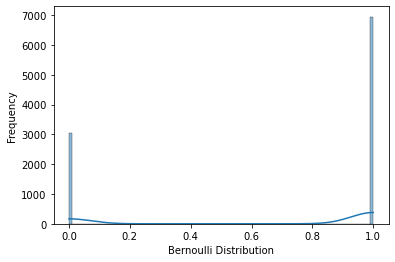

In [16]:
# plot bernoulli distribution using seaborn
sns.histplot(data_bernoulli, bins=100, kde=True).set(xlabel='Bernoulli Distribution', ylabel='Frequency')

In [17]:
# Bernoulli uses PMF because it's a discrete function.
# It's distributed over only 0 or 1 according to the prob. p
b_04_0 = bernoulli(p=0.4).pmf(0)
b_04_1 = bernoulli(p=0.4).pmf(1)
b_08_0 = bernoulli(p=0.8).pmf(0)
b_08_1 = bernoulli(p=0.8).pmf(1)
print("p=0.4 pmf(0):", b_04_0)
print("p=0.4 pmf(1):", b_04_1)
print("p=0.8 pmf(0):", b_08_0)
print("p=0.8 pmf(1):", b_08_1)

p=0.4 pmf(0): 0.6
p=0.4 pmf(1): 0.4
p=0.8 pmf(0): 0.19999999999999998
p=0.8 pmf(1): 0.8


In [18]:
# Evaluate the CDF for the bernoulli distribution at point 0.5
# As the values are concentrated only at the points 0 and 1
# we expect the return of the prob concentrated at the point 0.
# which is 0.6 given that 0.4 are on 1.
bernoulli(p=0.4).cdf(0.5)

0.6


---


### Binomial distribution

In [19]:
from scipy.stats import binom

In [20]:
# generate distribution data with number of trials (n) and prob (p)
n = 10
p = 0.8
data_binom = binom.rvs(n=n,p=p,size=10000)

[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

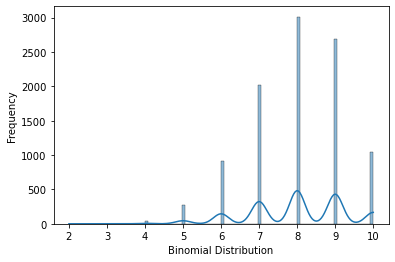

In [21]:
sns.histplot(data_binom, bins=100, kde=True).set(xlabel='Binomial Distribution', ylabel='Frequency')

As the prob of success is greater than 0.5 the distribution is right skewed.

In [22]:
# Binomial uses PMF because it's a discrete function.
b_08_02 = binom(n=10,p=0.8).pmf(2)
b_08_06 = binom(n=10,p=0.8).pmf(6)
b_08_08 = binom(n=10,p=0.8).pmf(8)
b_08_10 = binom(n=10,p=0.8).pmf(10)
print("p=0.8 pmf(1):", b_08_02)
print("p=0.8 pmf(6):", b_08_06)
print("p=0.8 pmf(8):", b_08_08)
print("p=0.8 pmf(10):", b_08_10)

p=0.8 pmf(1): 7.372799999999991e-05
p=0.8 pmf(6): 0.08808038400000004
p=0.8 pmf(8): 0.301989888
p=0.8 pmf(10): 0.10737418240000005


In [23]:
# Evaluate the CDF for a binomial distribution 
# (10 trials, 0.8 prob of success) at point 9
binom(n=10, p=0.8).cdf(9)

0.8926258175999999


---


### Exponential distribution

In [24]:
from scipy.stats import expon

In [25]:
# generate distribution data given rate parameter, start point and 
# size = number of random variables
rate = 1
start = 0
data_expon = expon.rvs(scale=rate,loc=start,size=1000)

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

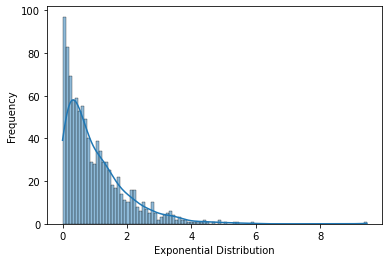

In [26]:
sns.histplot(data_expon, bins=100, kde=True).set(xlabel='Exponential Distribution', ylabel='Frequency')

In [27]:
# Evaluate the PDF for the same distribution at different points
# The max is where the function starts, 0 in this case
exp_m10 = expon(scale=rate, loc=start).pdf(-1)
exp_00 = expon(scale=rate, loc=start).pdf(0)
exp_05 = expon(scale=rate, loc=start).pdf(0.5)
exp_20 = expon(scale=rate, loc=start).pdf(2)
print("x=-1:", exp_m10)
print("x=0:", exp_00)
print("x=0.5:", exp_05)
print("x=2:", exp_20)

x=-1: 0.0
x=0: 1.0
x=0.5: 0.6065306597126334
x=2: 0.1353352832366127


In [28]:
# Evaluate the CDF for a exponential distribution 
expon(scale=1, loc=start).cdf(1)

0.6321205588285577


---


### Poisson distribution

In [29]:
from scipy.stats import poisson

In [30]:
# generate poisson distribution data given rate parameter (mu), start point and 
# size = number of random variables
mu = 3
start = 0
data_poisson = poisson.rvs(mu=mu, loc=start, size=10000)

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

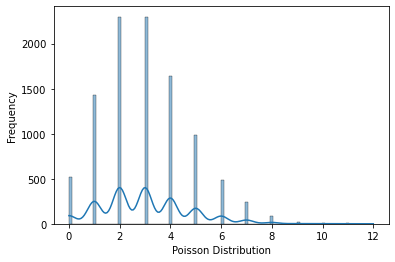

In [31]:
sns.histplot(data_poisson, bins=100, kde=True).set(xlabel='Poisson Distribution', ylabel='Frequency')

In [32]:
# Poisson uses PMF because it's a discrete function.
p_1 = poisson(mu=3).pmf(1)
p_2 = poisson(mu=3).pmf(2)
p_3 = poisson(mu=3).pmf(3)
p_4 = poisson(mu=3).pmf(4)
p_5 = poisson(mu=3).pmf(5)
print("mu=3 pmf(1):", p_1)
print("mu=3 pmf(2):", p_2)
print("mu=3 pmf(3):", p_3)
print("mu=3 pmf(4):", p_4)
print("mu=3 pmf(5):", p_5)

mu=3 pmf(1): 0.14936120510359185
mu=3 pmf(2): 0.22404180765538775
mu=3 pmf(3): 0.22404180765538775
mu=3 pmf(4): 0.16803135574154085
mu=3 pmf(5): 0.10081881344492458


In [33]:
# Evaluate the CDF for a poisson distribution up to position 4 
poisson(mu=3).cdf(4)

0.8152632445237722


---


### Beta distribution

In [34]:
from scipy.stats import beta

In [35]:
# beta takes a and b as shape parameters.
a = 1
b = 3
start = 0
data_beta = beta.rvs(a=a, b=b, loc=start, size=10000)

[Text(0.5, 0, 'Beta Distribution'), Text(0, 0.5, 'Frequency')]

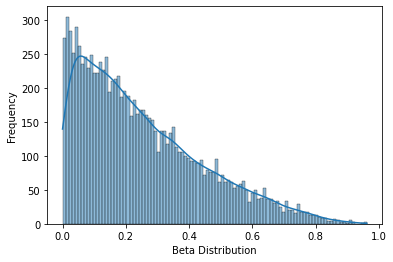

In [36]:
sns.histplot(data_beta, bins=100, kde=True).set(xlabel='Beta Distribution', ylabel='Frequency')


---


### Gamma distribution

In [37]:
from scipy.stats import gamma

In [38]:
# generate gamma distribution data given shape parameter (a), start point and 
# size = number of random variables
a = 3
start = 0
data_gamma = gamma.rvs(a=a, loc=start, size=10000)

[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

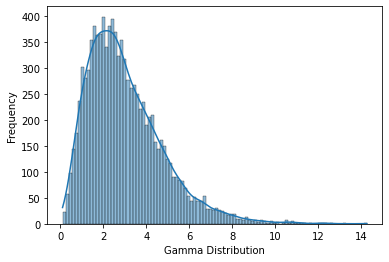

In [39]:
sns.histplot(data_gamma, bins=100, kde=True).set(xlabel='Gamma Distribution', ylabel='Frequency')

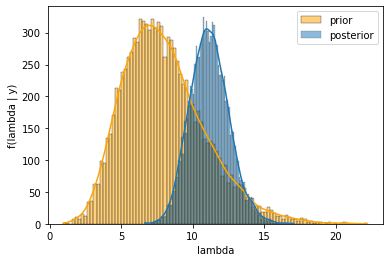

In [40]:
# generate 2 gamma distributions, a prior and a posterior
data_gamma_prior = gamma.rvs(a=8, scale=1, size=10000)
data_gamma_post = gamma.rvs(a=67, scale=1/6, size=10000)

sns.histplot(data_gamma_prior, bins=100, kde=True, color='orange', label='prior').set(xlabel='lambda', ylabel='f(lambda | y)')
sns.histplot(data_gamma_post, bins=100, kde=True, label='posterior')
plt.legend()
plt.show()

[]

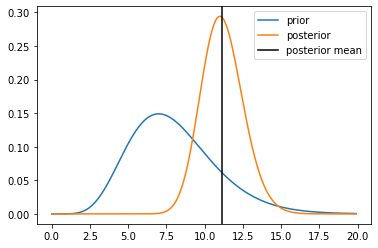

In [41]:
# generate the same plot above but with matplotlib
lbda = [i for i in np.arange(0.01, 20, 0.1)]
plt.plot(lbda, gamma(a=8, scale=1).pdf(lbda), label='prior')
plt.plot(lbda, gamma(a=67, scale=1/6).pdf(lbda), label='posterior')
plt.axvline(x=67/6, color='black', label='posterior mean')
plt.legend()
plt.plot()